#Correlación y causalidad

La **correlación** examina la relación entre dos variables. Sin embargo, observar que dos variables se mueven conjuntamente no significa necesariamente que una variable sea la causa de la otra. Por eso solemos decir que "la **correlación** no implica **causalidad**".

Aquí mostramos un ejemplo bastante llamativo con datos del INE que servirá para ejemplificar estos conceptos.

##Librerías

In [1]:
#cargamos las librerías que nos van a hacer falta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Datos

Empleamos un dataset con distintas variables y de dintinta temática para ver si hay correlación entre ellas.

In [2]:
#Cargar el dataset
from google.colab import files
uploaded = files.upload()
ccaa = 'causalidad.xlsx'
data = pd.read_excel(ccaa, sheet_name='Datos', header = 0)

print (data.head(6))

Saving causalidad.xlsx to causalidad.xlsx
        ccaa    libros  altas_hospitalarias  ...  gasto_vino  nacimientos  divorcios
0  andalucia  0.000821             0.084342  ...    0.028465     0.008248   0.002030
1     aragon  0.001181             0.113732  ...    0.035979     0.007310   0.001547
2   asturias  0.000943             0.113822  ...    0.049680     0.005037   0.002048
3   baleares  0.000753             0.116687  ...    0.057559     0.008422   0.002129
4   canarias  0.000364             0.086515  ...    0.033147     0.006565   0.002055
5  cantabria  0.000922             0.099663  ...    0.046443     0.006104   0.002027

[6 rows x 12 columns]


In [3]:
#indexamos las CCAA
datos = data.set_index('ccaa')
datos.head()

,libros,altas_hospitalarias,matrimonios,gasto_chocolate,gasto_cerveza,condenados,gasto_restaurante,gasto_automoviles,gasto_vino,nacimientos,divorcios
ccaa,,,,,,,,,,,
andalucia,0.000821,0.084342,0.003559,0.060799,0.037068,0.006518,1.029601,0.479079,0.028465,0.008248,0.002030
aragon,0.001181,0.113732,0.002951,0.070738,0.030821,0.005110,1.346879,0.455055,0.035979,0.007310,0.001547
asturias,0.000943,0.113822,0.003182,0.085968,0.024933,0.006064,1.216873,0.488539,0.049680,0.005037,0.002048
baleares,0.000753,0.116687,0.004245,0.077483,0.048186,0.007252,1.249908,0.592273,0.057559,0.008422,0.002129
canarias,0.000364,0.086515,0.003431,0.077495,0.030958,0.007189,0.808606,0.510542,0.033147,0.006565,0.002055


##Visualización correlación entre variables

Una vez obtenidos los datos pasamos a ver la posible correlación entre las distintas variables que componen el dataset

In [4]:
#Creación de la matriz de correlación
corr_matr = datos.corr()
display(corr_matr)

,libros,altas_hospitalarias,matrimonios,gasto_chocolate,gasto_cerveza,condenados,gasto_restaurante,gasto_automoviles,gasto_vino,nacimientos,divorcios
libros,1.000000,0.386677,0.051359,0.171023,0.090658,-0.078537,0.520452,0.063427,0.329029,0.286193,0.059209
altas_hospitalarias,0.386677,1.000000,-0.013870,0.387990,-0.129955,-0.094823,0.498431,0.284025,0.632435,-0.089601,-0.141796
matrimonios,0.051359,-0.013870,1.000000,0.045735,0.616347,0.626882,-0.054952,0.349601,0.311964,0.382051,0.613402
gasto_chocolate,0.171023,0.387990,0.045735,1.000000,-0.185820,0.295196,0.456733,0.633725,0.741026,-0.229911,0.263128
gasto_cerveza,0.090658,-0.129955,0.616347,-0.185820,1.000000,0.474477,-0.000051,0.022296,-0.048180,0.809555,0.230688
condenados,-0.078537,-0.094823,0.626882,0.295196,0.474477,1.000000,-0.049548,0.528422,0.296763,0.268405,0.781370
gasto_restaurante,0.520452,0.498431,-0.054952,0.456733,-0.000051,-0.049548,1.000000,0.249803,0.514239,0.232884,-0.106225
gasto_automoviles,0.063427,0.284025,0.349601,0.633725,0.022296,0.528422,0.249803,1.000000,0.604290,0.094185,0.580939
gasto_vino,0.329029,0.632435,0.311964,0.741026,-0.048180,0.296763,0.514239,0.604290,1.000000,-0.151590,0.383794
nacimientos,0.286193,-0.089601,0.382051,-0.229911,0.809555,0.268405,0.232884,0.094185,-0.151590,1.000000,0.035456


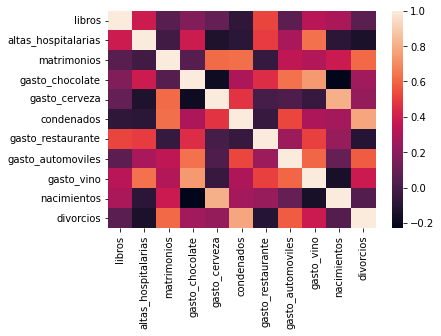

In [ ]:
# Heatmap matriz de correlaciones

heat_map = sns.heatmap(corr_matr)
heat_map;

Tanto a través de la matriz de correlación como del heatmap se observa una alta correlación entre las variables Gasto_cerveza y nacimientos. Procedemos a realizar un modelo de MCO para obtener más detalles.

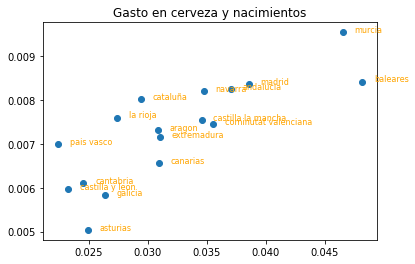

In [ ]:
#Gráfico
x = data['gasto_cerveza']
y = data['nacimientos']
fig, ax = plt.subplots()
ax.plot(x,y,'o')
ax.set_title('Gasto en cerveza y nacimientos')

#Para que aparezcan los nombres de las CCAA
for i in range(data.shape[0]): #data.shape[0] es el número de filas del dataset, si fuera data.shape[1] sería el de las columnas
    plt.text(x=data.gasto_cerveza[i]+0.001, y=data.nacimientos[i], s=data.ccaa[i],
             fontdict=dict(color='orange',size=8))

##Ajuste del modelo

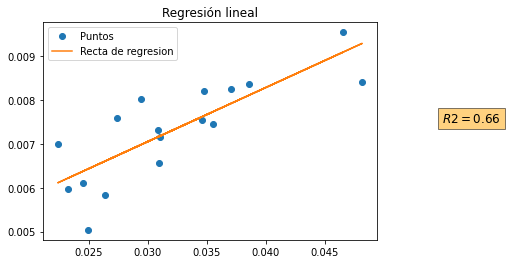

In [ ]:
#Librería
from sklearn.linear_model import LinearRegression

reg =LinearRegression()
reg.fit(x.values.reshape(-1,1),y) # ajuste del modelo

# Calculo de las betas y de r2
r2=(round(reg.score(x.values.reshape(-1,1), y),2))

# Gráfico
fig, ax = plt.subplots()
ax.plot(x, y,'o',label='Puntos')
ax.plot(x, reg.predict(x.values.reshape(-1,1)), label='Recta de regresion')
ax.legend() #Para la leyenda dentro de la gráfica

#Para insertar la cajita con información adicional
textstr = r'$R2=%.2f$' % (r2, )
ax.text(0.055,0.0075, textstr, fontsize = 12, bbox=dict(facecolor='orange', alpha=0.5))

ax.set_title('Regresión lineal')
fig.show()

Según este análisis, los nacimientos son emplicados en un 66% (porcentaje bastante elevado) por el gasto en cerveza, de lo que se desperende que contra más cerveza se consume más niños nacen.

Este es un buen ejemplo para ilustrar que una alta correlación no tiene que implicar causalidad, si no que puede haber muchos factores detrás, como simplemente la casualidad. De ahí la importancia del razocinio económico y saber separar una cosa de la otra.